## Part 1: Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder

#  Import and read the attrition data
attrition_df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m19/lms/datasets/attrition.csv')
attrition_df.head()
attrition_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,40,3,...,3,4,1,6,3,3,2,2,2,2


In [2]:
# Determine the number of unique values in each column.
attrition_df.nunique()

Age                         43
Attrition                    2
BusinessTravel               3
Department                   3
DistanceFromHome            29
Education                    5
EducationField               6
EnvironmentSatisfaction      4
HourlyRate                  71
JobInvolvement               4
JobLevel                     5
JobRole                      9
JobSatisfaction              4
MaritalStatus                3
NumCompaniesWorked          10
OverTime                     2
PercentSalaryHike           15
PerformanceRating            2
RelationshipSatisfaction     4
StockOptionLevel             4
TotalWorkingYears           40
TrainingTimesLastYear        7
WorkLifeBalance              4
YearsAtCompany              37
YearsInCurrentRole          19
YearsSinceLastPromotion     16
YearsWithCurrManager        18
dtype: int64

In [3]:
# Create y_df with the Attrition and Department columns
y_df = attrition_df[['Attrition','Department']]

In [4]:
# Create a list of at least 10 column names to use as X data
Xlist = ['Education','Age','DistanceFromHome','JobSatisfaction','OverTime','StockOptionLevel',
         'WorkLifeBalance','YearsAtCompany','YearsSinceLastPromotion','NumCompaniesWorked','HourlyRate']
# Create X_df using your selected columns
X_df = attrition_df[Xlist]

# Show the data types for X_df
X_df.dtypes

Education                   int64
Age                         int64
DistanceFromHome            int64
JobSatisfaction             int64
OverTime                   object
StockOptionLevel            int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsSinceLastPromotion     int64
NumCompaniesWorked          int64
HourlyRate                  int64
dtype: object

In [5]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df)

In [6]:
# Convert your X data to numeric data types however you see fit
# Add new code cells as necessary
display(X_df['OverTime'].value_counts())
overtime_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train['OverTime'] = overtime_ohe.fit_transform(X_train['OverTime'].values.reshape(-1,1))
X_test['OverTime'] = overtime_ohe.fit_transform(X_test['OverTime'].values.reshape(-1,1))

No     1054
Yes     416
Name: OverTime, dtype: int64

In [7]:
# Create a StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler to the training data
#X_train_scaled = scaler.fit_transform(X_train)
scaler.fit(X_train)

# Scale the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Create a OneHotEncoder for the Department column
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder to the training data
ohe.fit(y_train[['Department']])

# Create two new variables by applying the encoder
# to the training and testing data
y_train_department_encoded = ohe.transform(y_train[['Department']])
y_test_department_encoded = ohe.transform(y_test[['Department']])

y_test_department_encoded[:5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [9]:
# Create a OneHotEncoder for the Attrition column
ohe_attrition = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder to the training data
ohe_attrition.fit(y_train[['Attrition']])

# Create two new variables by applying the encoder
# to the training and testing data
y_train_attrition_encoded = ohe_attrition.transform(y_train[['Attrition']])
y_test_attrition_encoded = ohe_attrition.transform(y_test[['Attrition']])

y_test_attrition_encoded[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

## Create, Compile, and Train the Model

In [10]:
# Find the number of columns in the X training data
X_train_column_length = len(X_train.columns)

# Create the input layer
input = layers.Input(shape=(X_train_column_length,))

# Create at least two shared layers
shared1 = layers.Dense(units=64, activation="relu", name='shared1')(input)
shared2 = layers.Dense(units=128, activation="relu", name='shared2')(shared1)

In [11]:
# Create a branch for Department
# with a hidden layer and an output layer

# Create the hidden layer
department_hidden = layers.Dense(units=64, activation="relu", name='department_hidden')(shared2)

# Create the output layer
department_output = layers.Dense(units=3, activation="relu", name='department_output')(department_hidden)

In [12]:
# Create a branch for Attrition
# with a hidden layer and an output layer

# Create the hidden layer
attrition_hidden = layers.Dense(units=32, activation="relu", name='attrition_hidden')(shared2)

# Create the output layer
attrition_output = layers.Dense(units=2, activation="relu", name='attrition_output')(attrition_hidden)

In [13]:
# Create the model
nn_model = Model(inputs=input,outputs=[department_output,attrition_output])

# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Summarize the model
nn_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 11)]                 0         []                            
                                                                                                  
 shared1 (Dense)             (None, 64)                   768       ['input_1[0][0]']             
                                                                                                  
 shared2 (Dense)             (None, 128)                  8320      ['shared1[0][0]']             
                                                                                                  
 department_hidden (Dense)   (None, 64)                   8256      ['shared2[0][0]']             
                                                                                              

In [14]:
# Train the model
history = nn_model.fit(X_train_scaled, [y_train_department_encoded,y_train_attrition_encoded],
                       validation_data=(X_test_scaled, [y_test_department_encoded,y_test_attrition_encoded]),
                       batch_size=32, epochs=100)#, verbose=1)

Epoch 1/100
35/35 [==============================] - 8s 37ms/step - loss: 2.1101 - department_output_loss: 1.1938 - attrition_output_loss: 0.9164 - department_output_accuracy: 0.5127 - attrition_output_accuracy: 0.8194 - val_loss: 1.3378 - val_department_output_loss: 0.6239 - val_attrition_output_loss: 0.7139 - val_department_output_accuracy: 0.6549 - val_attrition_output_accuracy: 0.8261
Epoch 2/100
35/35 [==============================] - 0s 14ms/step - loss: 1.1992 - department_output_loss: 0.6135 - attrition_output_loss: 0.5857 - department_output_accuracy: 0.6334 - attrition_output_accuracy: 0.8494 - val_loss: 1.3817 - val_department_output_loss: 0.6592 - val_attrition_output_loss: 0.7225 - val_department_output_accuracy: 0.6630 - val_attrition_output_accuracy: 0.8234
Epoch 3/100
35/35 [==============================] - 1s 17ms/step - loss: 1.1380 - department_output_loss: 0.5927 - attrition_output_loss: 0.5452 - department_output_accuracy: 0.6443 - attrition_output_accuracy: 0.85

In [15]:
# print accuracy of training data to fit
evaluate_score_training = nn_model.evaluate(X_train_scaled,[y_train_department_encoded,y_train_attrition_encoded])
# Print the accuracy for both department and attrition from the training data
display(f'Department predictions accuracy: {round(evaluate_score_training[3],3)}')
display(f'Attrition predictions accuracy: {round(evaluate_score_training[4],3)}')

35/35 [==============================] - 0s 2ms/step - loss: 0.1365 - department_output_loss: 0.0719 - attrition_output_loss: 0.0646 - department_output_accuracy: 0.9882 - attrition_output_accuracy: 0.9936


'Department predictions accuracy: 0.988'

'Attrition predictions accuracy: 0.994'

In [16]:
# Evaluate the model with the testing data
#loss, department_output_loss, attrition_output_loss, department_output_accuracy, attrition_output_accuracy = nn_model.evaluate(X_test_scaled,[y_test_department_encoded,y_test_attrition_encoded],verbose=2)
evaluate_score = nn_model.evaluate(X_test_scaled,[y_test_department_encoded,y_test_attrition_encoded],verbose=2)
evaluate_score

12/12 - 0s - loss: 4.8706 - department_output_loss: 2.3538 - attrition_output_loss: 2.5169 - department_output_accuracy: 0.5652 - attrition_output_accuracy: 0.7554 - 49ms/epoch - 4ms/step


[4.870639801025391,
 2.353787660598755,
 2.516852855682373,
 0.5652173757553101,
 0.7554348111152649]

In [17]:
# Print the accuracy for both department and attrition
display(f'Department predictions accuracy: {round(evaluate_score[3],3)}')
display(f'Attrition predictions accuracy: {round(evaluate_score[4],3)}')

'Department predictions accuracy: 0.565'

'Attrition predictions accuracy: 0.755'

# Summary

In the provided space below, briefly answer the following questions.

1. Is accuracy the best metric to use on this data? Why or why not?

2. What activation functions did you choose for your output layers, and why?

3. Can you name a few ways that this model might be improved?

# YOUR ANSWERS HERE

1. Yes and no. Accuracy can tell you how well your model fits the data but it doesn't tell you if you have data leakage which will artificially increase score. The department and attrition columns are also imbalanced. The attrition rate for leaving is (133+92+12=) 237 and for staying is (828+354+51=) 1233, which is not spread across all the departments evenly. According to the class notes:
a) You can achieve high accuracy values by "only predicting the majority class."
b) It also "doesn’t explain which errors are being made (false positives or false negatives), and the costs of a false positive and a false negative are rarely equal in real-world situations"
c) And it doesn't "take into account the certainty of the model in its calculation"

The model has a high accuracy score for the training data (> 95% for the attrition and department outputs) and a decreasing loss value with increasing epochs, but when you evaluate the testing data the accuracy gets worse with more epochs above 17 or so. In addition, the losses in the testing data never decrease. This may indicate that the model is over fitted on the training data.

2. I ended up using the relu function for all the layers as this seemed to give the best accuracy score for the training data compared with using some combination of relu, sigmoid, tanh, and or softmax.

3. Methods that the model can be improved by:
a) obtaining more data.
b) reducing the number of epochs or layers in the training to avoid overfitting.
c) change the splitting percentage of the testing and training data.
d) check the data quality for possible outliers or collinearity.

In [18]:
# printing out the number that stay/leave in each department
attrition_df[['Attrition','Department']].value_counts()

Attrition  Department            
No         Research & Development    828
           Sales                     354
Yes        Research & Development    133
           Sales                      92
No         Human Resources            51
Yes        Human Resources            12
dtype: int64

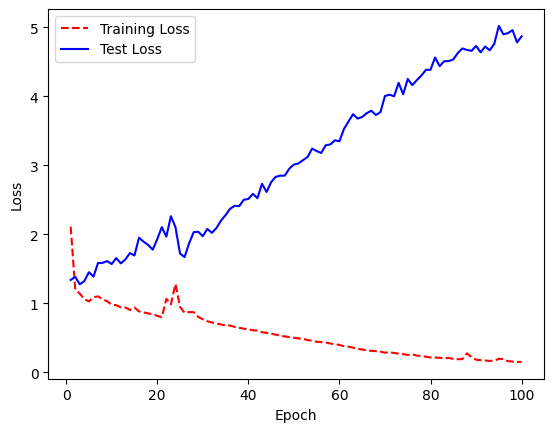

In [19]:
# plotting the traing and testing loss vs epoch
import matplotlib.pyplot as plt
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

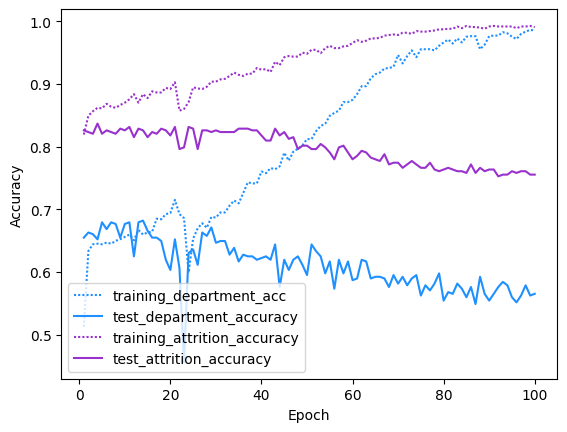

In [20]:
# plotting the accuracy of the department and attriation values for the training and testing data
# Get training and test accuracy histories
training_department_accuracy = history.history['department_output_accuracy']
test_department_accuracy = history.history['val_department_output_accuracy']
training_attrition_accuracy = history.history['attrition_output_accuracy']
test_attrition_accuracy = history.history['val_attrition_output_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_department_accuracy) + 1)

# Visualize loss history
plt.plot(epoch_count, training_department_accuracy, color ='dodgerblue', dashes=[1, 1])
plt.plot(epoch_count, test_department_accuracy, color = 'dodgerblue')
plt.plot(epoch_count, training_attrition_accuracy, color = "darkorchid", dashes=[1, 1])
plt.plot(epoch_count, test_attrition_accuracy, 'darkorchid')
plt.legend(['training_department_acc','test_department_accuracy',
            'training_attrition_accuracy','test_attrition_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();